<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Como_dise%C3%B1ar_buenas_Features_y_maldici%C3%B3n_de_la_dimensi%C3%B3n_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como diseñar buenas Features y maldición de la Dimensión
## Mg. Rubén Quispe


Mejorar la performance de nuestros modelos no solo pasa por optimizar sus parametros.
Una de las partes clave, y según algunos expertos la más importante, es la de **diseñar la representación en la que se entregan los datos a los modelos** para que estos los procesen.
Esto equivale, en palabras más simples, en definir de forma inteligente las features (columnas) de nuestras tablas de datos.

Ejemplo de feature engineering:

El problema:

Supongamos que estamos tratando de resolver el problema siguiente.

Tenemos un problema de reconocer si ciertos datos con una sola feature son de una clase 1 o de una clase 2 (por ejemplo "el producto esta deficiente" o "el producto esta funcional").
Por lo tanto estamos resolviendo una clasificación.
Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la "mejor" recta que separa los puntos de cada clase.

![title](clase.jpg)

Como podemos ver no existe un separador óptimo. Debemos para resolver el problema buscar un modelo aún más poderoso? No necesariamente.

Agregemos una nueva feature:
$$X[columna_2] = X[columna_1]^2$$
![title](clase1.jpg)

Claramente con esta nueva feature vemos que existe una recta que separa los espacios de puntos.
Esta recta tendra un score ampliamente mejor que cualquier solucion al primer problema.

# Principios de diseño de Features
Diseñar tus features es un arte más que una ciencia (por lo que en general te recomendamos ganar experiencia leyendo articulos cientificos y viendo soluciones
1. Features Informativas: Tus features son más utiles mientras más correlación tengan tu variable objetivo.
2. Features Independientes: Para no tener redudancias tus features deberían ser lo más independientes posible entre ellas.
3. Cantidad de Features controlada: Nuestra intuición nos falla en dimensiones superiores a 3 (ver video maldicion de la dimensionalidad). En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no contamos con una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos

## Ejemplo de Feature informativa y Feature no informativa

Predecir el **precio de una casa** en **función de sus metros cuadrados**.

Predecir el **precio de una casa** en **función de la temperatura del mar**.

Es importante entender la correlación entre la feature y la variable objetivo. Más sobre esto en los siguientes videos.


# Visualizar interdepencia entre variables

In [ ]:
import pandas as pd
X = pd.read_csv('D:/TECHNOLOGY 2020/Data/X.csv').drop('worldwide_gross',axis=1)

<AxesSubplot:>

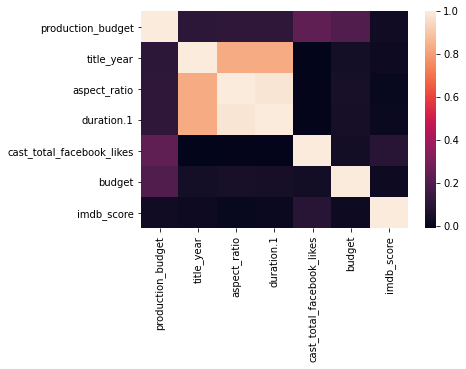

In [ ]:
import seaborn as sns
%matplotlib inline 

sns.heatmap(X.corr())

In [ ]:
X.corr()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.108014,0.111093,0.113107,0.236820,0.198268,0.033154
title_year,0.108014,1.000000,0.833058,0.833214,-0.013226,0.041345,0.021057
aspect_ratio,0.111093,0.833058,1.000000,0.980641,-0.009069,0.052507,0.009654
duration.1,0.113107,0.833214,0.980641,1.000000,-0.006138,0.048788,0.013964
cast_total_facebook_likes,0.236820,-0.013226,-0.009069,-0.006138,1.000000,0.035872,0.096663
budget,0.198268,0.041345,0.052507,0.048788,0.035872,1.000000,0.018949
imdb_score,0.033154,0.021057,0.009654,0.013964,0.096663,0.018949,1.000000


# La maldición de la dimensión
Datasaurus Dozen y Anscombe's quartet:

Utilidad de la capacidad de entender los datos en 1, 2 y 3 dimensiones del ojo humano.

Maldición de la dimensionalidad:

En dimensión superior o igual a 4, nuestra capacidad de entender los datos se pierde, y aún peor fenomenos extraños/contraproducentes ocurren

### Ejemplo 1

Que largo debe tener cada arista de un hypercubo de dimension p que capture 10% del volumen de un hypercubo de volumen 1 que lo contiene?

![title](cube.jpg)


$$ V_{hypercubo} = a^p\ y\ si\ V_{hypercubo} = 0.1 \implies a = 0.1^{1/p}$$$$$$

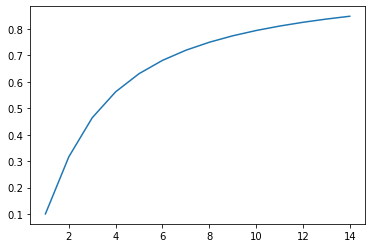

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.plot(x,y)

En dimensión 10: Necesitamos un hypercubo que cubra 80% de cada una de las aristas para solamente obtener 10% del volumen!

En alta dimensión es muy poco probable que tus ejemplos cubran todo el espacio de forma densa.
Por ende en **alta dimensión necesitas una cantidad de datos que crece exponencialmente para poder entrenar tus modelos**.
Te recomendamos tener cuidado al aumentar la dimensión de tus datos, no esta prohibido, pero hacerlo de forma exagerada te puede llevar hacia estos problemas.